In [2]:
import datetime as dt
import numpy as np
from mtgoScraper import *

if __name__ == '__main__':
    endDate = dt.datetime.today()
    startDate = endDate - dt.timedelta(weeks=1)

    startMonth = dt.datetime(startDate.year, startDate.month, 1)
    endMonth = dt.datetime(endDate.year, endDate.month, 1)
    months = pd.date_range(start=startMonth, end=endMonth, freq='MS')

    startDate = dt.date(startDate.year, startDate.month, startDate.day)

    rawDeckLists = []
    for month in months:
        monthList = mtgoScrape.formatDeckList(queryFormat,month.year,month.month)
        rawDeckLists += monthList

    skipUrls = []

    urlList = [x['url'] for x in rawDeckLists if x['url'] not in skipUrls if x['date']>=startDate]

    deckList = mtgoScrape.mtgoScrapeMain(urlList)

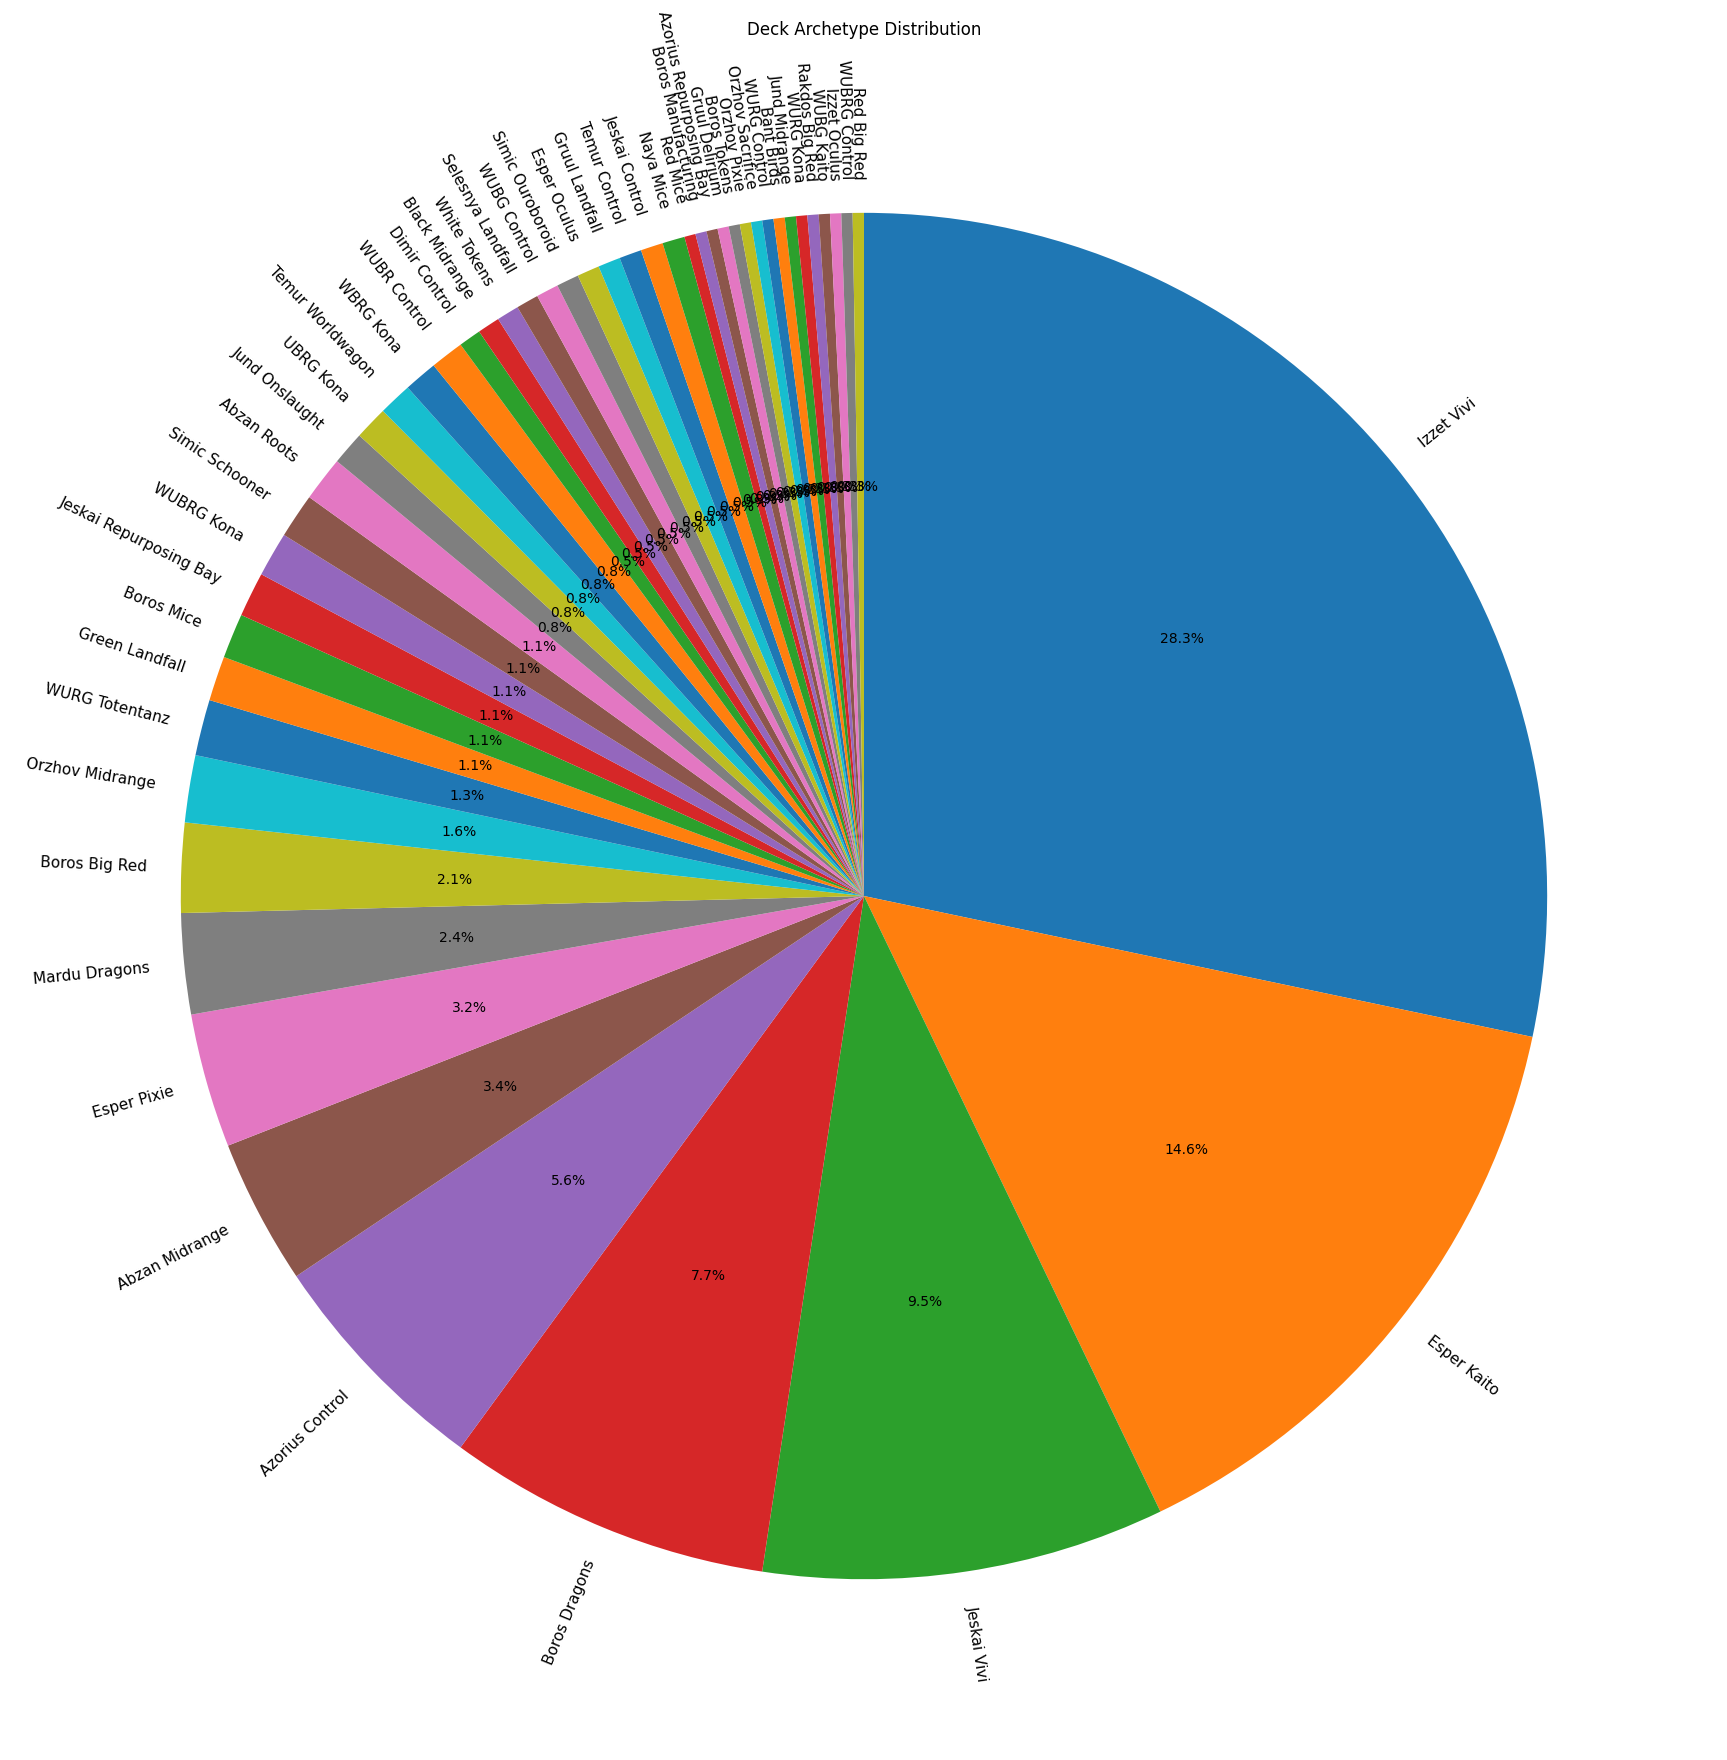

In [3]:
decks = [x.deckName for x in deckList]
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(18, 18))
wedges, _, _ = ax.pie(
    deck_counts,
    startangle=90,
    counterclock=False,
    autopct='%1.1f%%'
)

# Manually place labels at wedge centers
total = sum(deck_counts)
for i, wedge in enumerate(wedges):
    # Compute center angle of wedge
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    # Position label slightly outside the wedge
    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    # Flip alignment and rotation for left side
    ha = 'left' if x >= 0 else 'right'
    rotation = angle if x >= 0 else angle + 180

    ax.text(
        x * 1.05, y * 1.05,
        deck_counts.index[i],
        ha=ha,
        va='center',
        rotation=rotation,
        rotation_mode='anchor',
        fontsize=11
    )

plt.title("Deck Archetype Distribution")
plt.tight_layout()
plt.show()



In [4]:
cardDf = pd.concat([x.deckDf for x in deckList]).reset_index().groupby('Card Name')['Quantity'].sum().reset_index()
cardDf = cardDf.sort_values(by='Quantity', ascending=False)
cardDf = identifyDeck.enrichDataFrame(cardDf, oracle.expandedClean())
cardDf

,Card Name,Quantity,name,mana_cost,type_line,oracle_text,power,toughness,colors,color_identity,set,rarity,back_name,back_type_line,back_oracle_text,back_power,back_toughness
0,Mountain,1410,Mountain,,Basic Land — Mountain,({T}: Add {R}.),NaN,NaN,[],[R],tla,common,NaN,NaN,NaN,NaN,NaN
1,Island,1169,Island,,Basic Land — Island,({T}: Add {U}.),NaN,NaN,[],[U],tla,common,NaN,NaN,NaN,NaN,NaN
2,Riverpyre Verge,605,Riverpyre Verge,,Land,{T}: Add {R}.\n{T}: Add {U}. Activate only if ...,NaN,NaN,[],"[R, U]",dft,rare,NaN,NaN,NaN,NaN,NaN
3,Soulstone Sanctuary,597,Soulstone Sanctuary,,Land,{T}: Add {C}.\n{4}: This land becomes a 3/3 cr...,NaN,NaN,[],[],fdn,rare,NaN,NaN,NaN,NaN,NaN
4,Spirebluff Canal,576,Spirebluff Canal,,Land,This land enters tapped unless you control two...,NaN,NaN,[],"[R, U]",otj,rare,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,Desculpting Blast,1,Desculpting Blast,{1}{U},Instant,Return target nonland permanent to its owner's...,NaN,NaN,[U],[U],eoe,uncommon,NaN,NaN,NaN,NaN,NaN
483,Bloomvine Regent,1,Bloomvine Regent,{3}{G}{G},Creature — Dragon,Flying\nWhenever this creature or another Drag...,4,5,[G],[G],tdm,rare,Claim Territory,Sorcery — Omen,Search your library for up to two basic Forest...,NaN,NaN
484,Bite Down,1,Bite Down,{1}{G},Instant,Target creature you control deals damage equal...,NaN,NaN,[G],[G],fdn,common,NaN,NaN,NaN,NaN,NaN
485,Valorous Stance,1,Valorous Stance,{1}{W},Instant,Choose one —\n• Target creature gains indestru...,NaN,NaN,[W],[W],inr,uncommon,NaN,NaN,NaN,NaN,NaN


In [5]:
cardDf[~cardDf['type_line'].str.contains('Land')]

,Card Name,Quantity,name,mana_cost,type_line,oracle_text,power,toughness,colors,color_identity,set,rarity,back_name,back_type_line,back_oracle_text,back_power,back_toughness
5,Vivi Ornitier,563,Vivi Ornitier,{1}{U}{R},Legendary Creature — Wizard,{0}: Add X mana in any combination of {U} and/...,0,3,"[R, U]","[R, U]",fin,mythic,NaN,NaN,NaN,NaN,NaN
7,Agatha's Soul Cauldron,526,Agatha's Soul Cauldron,{2},Legendary Artifact,You may spend mana as though it were mana of a...,NaN,NaN,[],[],woe,mythic,NaN,NaN,NaN,NaN,NaN
8,Abrade,523,Abrade,{1}{R},Instant,Choose one —\n• Abrade deals 3 damage to targe...,NaN,NaN,[R],[R],tdc,uncommon,NaN,NaN,NaN,NaN,NaN
10,Winternight Stories,476,Winternight Stories,{2}{U},Sorcery,Draw three cards. Then discard two cards unles...,NaN,NaN,[U],[U],tdm,rare,NaN,NaN,NaN,NaN,NaN
11,Proft's Eidetic Memory,476,Proft's Eidetic Memory,{1}{U},Legendary Enchantment,"When Proft's Eidetic Memory enters, draw a car...",NaN,NaN,[U],[U],mkm,rare,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,Desculpting Blast,1,Desculpting Blast,{1}{U},Instant,Return target nonland permanent to its owner's...,NaN,NaN,[U],[U],eoe,uncommon,NaN,NaN,NaN,NaN,NaN
483,Bloomvine Regent,1,Bloomvine Regent,{3}{G}{G},Creature — Dragon,Flying\nWhenever this creature or another Drag...,4,5,[G],[G],tdm,rare,Claim Territory,Sorcery — Omen,Search your library for up to two basic Forest...,NaN,NaN
484,Bite Down,1,Bite Down,{1}{G},Instant,Target creature you control deals damage equal...,NaN,NaN,[G],[G],fdn,common,NaN,NaN,NaN,NaN,NaN
485,Valorous Stance,1,Valorous Stance,{1}{W},Instant,Choose one —\n• Target creature gains indestru...,NaN,NaN,[W],[W],inr,uncommon,NaN,NaN,NaN,NaN,NaN


In [6]:
[x.deckDf for x in deckList if 'Song of Totentanz' in x.keyCard][4]

Main/Side  \
Deck URL                                 Deck               
/decklist/standard-league-2025-08-179495 Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Main   
                                         Deck 1      Side   
                                         Deck 1      Side   
                                         Deck 1      Side   
                                         Deck 1      Side   
                                         Deck 1      Side   
                                         Deck 1      Side   
                                         Deck 1      Side   
                                         Deck 1      Side   
                                         Deck 1      Side   
                                         Deck 1      Side   
                                         Deck 1      Side   
                                         Deck 1      Side   

                                                               Card Name  \
Deck URL                                 Deck                              
/decklist/standard-league-2025-08-179495 Deck 1       Analyze the Pollen   
                                         Deck 1        Botanical Sanctum   
                                         Deck 1            Breeding Pool   
                                         Deck 1        Broadside Barrage   
                                         Deck 1                Bushwhack   
                                         Deck 1        Enduring Vitality   
                                         Deck 1                   Forest   
                                         Deck 1       Into the Flood Maw   
                                         Deck 1                   Island   
                                         Deck 1                 Mountain   
                                         Deck 1        Obliterating Bolt   
                                         Deck 1           Questing Druid   
                                         Deck 1       Ral, Crackling Wit   
                                         Deck 1          Riverpyre Verge   
                                         Deck 1        Song of Totentanz   
                                         Deck 1            Starting Town   
                                         Deck 1                 Stock Up   
                                         Deck 1          Stomping Ground   
                                         Deck 1     Stormchaser's Talent   
                                         Deck 1      Thundertrap Trainer   
                                         Deck 1          Torch the Tower   
                                         D

In [110]:
from itertools import combinations

def getJaccardForPair(deckPair):
    leftDeck = deckPair[0][['Main/Side','Card Name', 'Quantity']]
    rightDeck = deckPair[1][['Main/Side','Card Name', 'Quantity']]
    leftDeck = leftDeck[leftDeck['Main/Side'] != 'Side']
    rightDeck = rightDeck[rightDeck['Main/Side'] != 'Side']
    df = pd.merge(leftDeck,rightDeck,how='outer', left_on='Card Name', right_on='Card Name')
    df = df.fillna(0)
    df['Union'] = df[['Quantity_x','Quantity_y']].max(axis=1)
    df['Intersect'] = df[['Quantity_x','Quantity_y']].min(axis=1)
    return df

def getJaccVal(jaccedDf):
    jaccardVal = jaccedDf['Intersect'].sum() / jaccedDf['Union'].sum()
    return jaccardVal

totenDecks = [x.deckDf.reset_index(drop=True) for x in deckList if 'Vivi Ornitier' in x.keyCard]
jaccList = []
for eachPair in list(combinations(totenDecks,2)):
    jaccList += [getJaccVal(getJaccardForPair(eachPair))]

np.mean(jaccList)

np.float64(0.6207406086126964)

In [111]:
getJaccardForPair(list(combinations(totenDecks,2))[0])

,Main/Side_x,Card Name,Quantity_x,Main/Side_y,Quantity_y,Union,Intersect
0,Main,Abrade,2.0,Main,3.0,3.0,2.0
1,Main,Agatha's Soul Cauldron,4.0,Main,4.0,4.0,4.0
2,Main,Fear of Missing Out,4.0,Main,4.0,4.0,4.0
3,Main,Into the Flood Maw,3.0,Main,4.0,4.0,3.0
4,Main,Island,4.0,Main,5.0,5.0,4.0
5,Main,Marauding Mako,4.0,Main,4.0,4.0,4.0
6,Main,Mountain,4.0,Main,5.0,5.0,4.0
7,Main,Proft's Eidetic Memory,4.0,Main,4.0,4.0,4.0
8,Main,Quantum Riddler,1.0,Main,2.0,2.0,1.0
9,Main,Riverpyre Verge,4.0,Main,4.0,4.0,4.0
